In [0]:
# Library import
import numpy as np
import random
import matplotlib.pyplot as plt
import inspect


In [3]:
N = 5  # Maximum number of possible peak
Data_size = 200000 

Parameters = np.zeros((Data_size, N, 2))  # Set of Parameters ready
print(Parameters.shape[1])

5


In [0]:
# Lorentzian function that returns sum of multi-Lorentzian function with two arguments
def Lorentzian(x, *args):
    ''' returns sum of Multi-Lorentzian function 
    corresponding to each two arguments (a, b)'''
    a = args[::2]   # center
    b = args[1::2]  # sigma

    result = 0
    for i in range(len(a)):
        if a[i] > 0 and b[i] > 0:
            if len(a) == len(b):
                result +=  (1./ (np.pi * b[i])) * (b[i]**2 / ((x - a[i])**2 + b[i]**2))

    for xx in range(len(result)):
        result[xx] += 0.1* ((np.random.rand()*2) - 1)

    return result 
    # noise = -0.2 ~ 0.2 

In [5]:
# X domain fixed
x = np.arange(-2, 12, 0.01)
print(len(x))

1400


In [6]:
for i in range(len(Parameters)): # For each matrix in Parameter set...

    for j in range(Parameters.shape[1]): # For each raw in each matrix...
        
        # append two argument that will be used in Lorentzian function
        # Second parameter is constrained in range from 0.1 to 0.2
        a = np.random.rand()
        Parameters[i][0] = np.array([[ 10*np.random.rand(), 0.1*np.random.rand() + 0.1]])
        Parameters[i][1] = np.array([[ 10*np.random.rand(), 0.1*np.random.rand()+0.1]])
        Parameters[i][2] = np.array([[ 10*np.random.rand(), 0.1*np.random.rand()+0.1]])
        Parameters[i][3] = np.array([[ 10*np.random.rand(), 0.1*np.random.rand()+0.1]])
        Parameters[i][4] = np.array([[ 10*np.random.rand(), 0.1*np.random.rand()+0.1]])
    
# Check out
print(Parameters)

[[[0.58670434 0.17317199]
  [3.08038851 0.13113807]
  [0.06509861 0.13505494]
  [9.98352456 0.17355451]
  [8.6931682  0.13175183]]

 [[6.6221154  0.1153701 ]
  [7.13767361 0.15614798]
  [9.48037213 0.18777109]
  [3.30288093 0.14696923]
  [4.65650184 0.12640188]]

 [[4.68758402 0.1168544 ]
  [4.1762153  0.11585618]
  [8.13093195 0.19599345]
  [2.87572868 0.10679473]
  [0.2560237  0.11194118]]

 ...

 [[2.3491992  0.10015734]
  [7.56096904 0.17890191]
  [2.13604172 0.15186308]
  [5.06059067 0.12820303]
  [4.95253949 0.13639456]]

 [[8.31641259 0.17028081]
  [8.7313528  0.17523188]
  [2.21591934 0.1913778 ]
  [5.99905412 0.17297747]
  [8.95139857 0.18695084]]

 [[4.78620395 0.16696716]
  [5.07277761 0.1645559 ]
  [4.86184794 0.17790652]
  [7.20084165 0.16615581]
  [0.54134173 0.12452129]]]


In [0]:
# ================== Data Generating ================
Data_x = []
Data_y = []

for j in Parameters:  # For each parameter matrix...

    peak = random.randint(2, 2) # Random selection of Possible peak number
    j = list(j.reshape((2*N,))) # reshape processing to put it as *args in function, Since j is matrix

    if peak == 1:
        Data_x.append(Lorentzian(x, *j[0:2]))
        Data_y.append(np.array([j[0],j[1], 0, 0, 0, 0, 0, 0, 0, 0]))

    elif peak == 2:
        Data_x.append(Lorentzian(x, *j[0:4]))
        Data_y.append(np.array([j[0],j[1],j[2],j[3], 0, 0, 0, 0, 0, 0]))

    elif peak == 3:
        Data_x.append(Lorentzian(x, *j[0:6]))
        Data_y.append(np.array([j[0],j[1],j[2],j[3],j[4],j[5], 0, 0, 0, 0]))

    elif peak == 4:
        Data_x.append(Lorentzian(x, *j[0:8]))
        Data_y.append(np.array([j[0],j[1],j[2],j[3],j[4],j[5],j[6],j[7], 0, 0]))

    elif peak == 5:
        Data_x.append(Lorentzian(x, *j[0:]))
        Data_y.append(np.array([j[0],j[1],j[2],j[3],j[4],j[5],j[6],j[7],j[8],j[9]]))

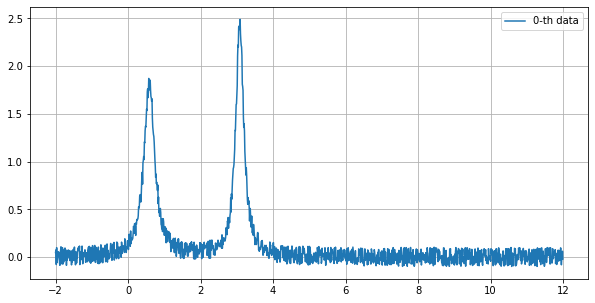

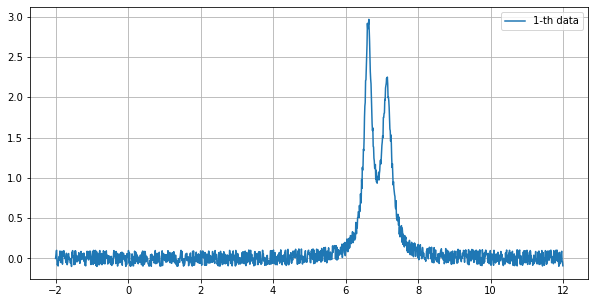

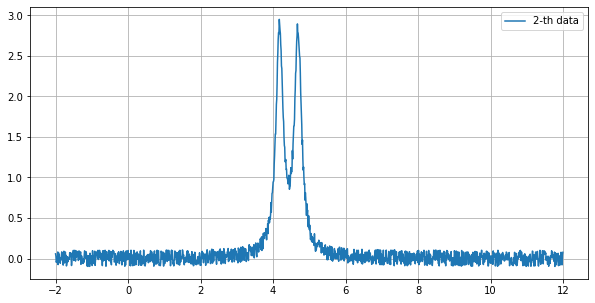

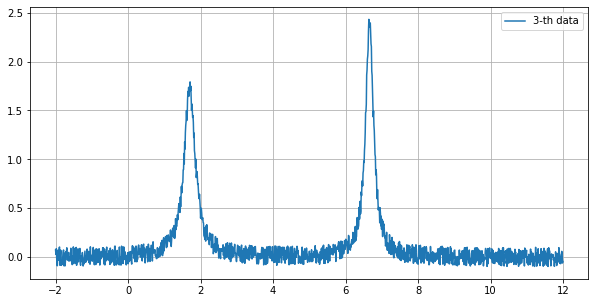

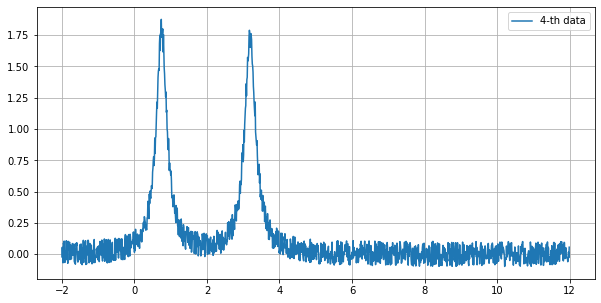

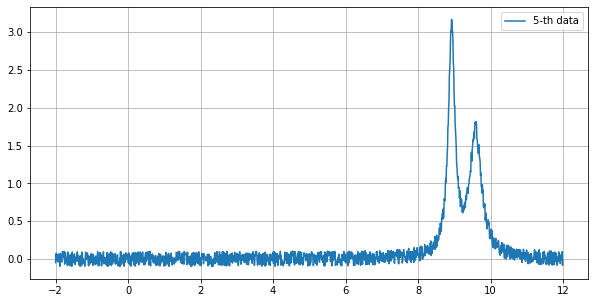

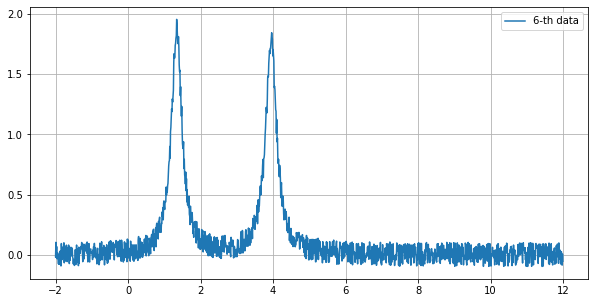

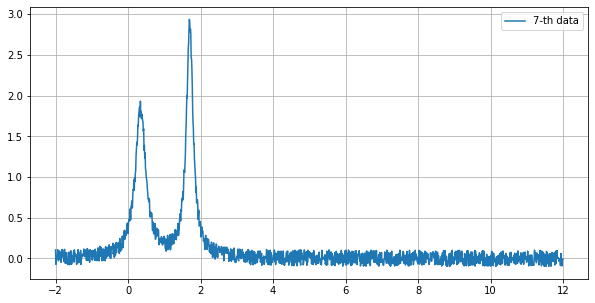

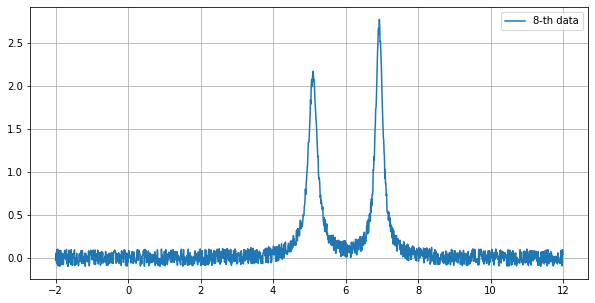

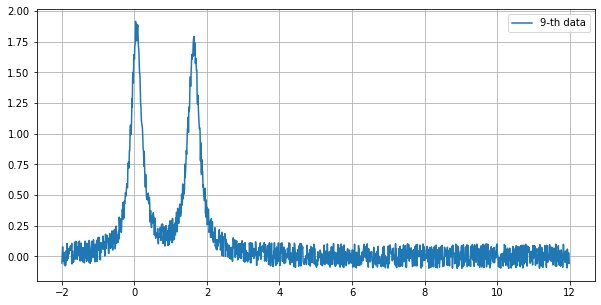

In [9]:
# Generated Data sample check!
# plt.figure(figsize=(12, 6))

for i in range(10):
    plt.figure(figsize=(10,5))
    plt.plot(x, Data_x[i], label = str(i) + '-th data')
    plt.legend()
    plt.grid('on')

In [10]:
x.shape
x = x.reshape(len(x))
x.shape

(1400,)

In [0]:
# Data spliting up into three group : training/validation/test

train_data = np.array(Data_x[:100000])
val_data = np.array(Data_x[100000:150000])
test_data = np.array(Data_x[150000:])

train_labels = np.array(Data_y[:100000])
val_labels = np.array(Data_y[100000:150000])
test_labels = np.array(Data_y[150000:])

In [12]:
# size test

print(train_data.shape, train_labels.shape)
print(val_data.shape, val_labels.shape)
print(test_data.shape, test_labels.shape)

(100000, 1400) (100000, 10)
(50000, 1400) (50000, 10)
(50000, 1400) (50000, 10)


In [0]:
# reshape for Image-form setting
# 2차원일때만!
#train_data = train_data.reshape(100000, 20, 20, 1)
#val_data = val_data.reshape(150000, 20, 20, 1)
#test_data = test_data.reshape(50000, 20, 20, 1)


In [0]:
# reshape for Image-form setting
# 1차원일때 변환
train_data = train_data.reshape(100000, len(x), 1)
val_data = val_data.reshape(50000, len(x), 1)
test_data = test_data.reshape(50000, len(x), 1)


In [16]:
# From Here on, let`s start to make Convolution Neural Network!
# Library import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Modeling
model2 = Sequential()

model2.add(Conv1D(64, 100, activation='relu', input_shape=(len(x), 1)))
model2.add(MaxPooling1D(2)) 

model2.add(Conv1D(32, 50, activation='relu'))
model2.add(MaxPooling1D(2)) 

model2.add(Conv1D(32, 30, activation='relu'))
model2.add(MaxPooling1D(2)) 

# Fully-Connected Layers
model2.add(GlobalMaxPooling1D())
model2.add(Dense(100, activation = 'relu'))
#model2.add(Dropout(0.3))
model2.add(Dense(10))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 1301, 64)          6464      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 650, 64)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 601, 32)           102432    
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 300, 32)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 271, 32)           30752     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 135, 32)           0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)               

In [0]:
model2.compile(loss='mse', metrics=['mae'], optimizer=Adam())


In [18]:
%%time
hist2 = model2.fit(train_data, train_labels, 
                   epochs=30, 
                   batch_size=2000,
                   validation_data=(val_data, val_labels), verbose=2)

Epoch 1/30
50/50 - 33s - loss: 2.3576 - mae: 0.7332 - val_loss: 1.8007 - val_mae: 0.5533
Epoch 2/30
50/50 - 32s - loss: 1.7690 - mae: 0.5343 - val_loss: 1.7308 - val_mae: 0.5273
Epoch 3/30
50/50 - 32s - loss: 1.6878 - mae: 0.5258 - val_loss: 1.6491 - val_mae: 0.5211
Epoch 4/30
50/50 - 32s - loss: 1.6006 - mae: 0.5166 - val_loss: 1.5337 - val_mae: 0.5082
Epoch 5/30
50/50 - 32s - loss: 1.4537 - mae: 0.4957 - val_loss: 1.3833 - val_mae: 0.4984
Epoch 6/30
50/50 - 32s - loss: 1.3272 - mae: 0.4797 - val_loss: 1.2792 - val_mae: 0.4701
Epoch 7/30
50/50 - 32s - loss: 1.2387 - mae: 0.4694 - val_loss: 1.1832 - val_mae: 0.4636
Epoch 8/30
50/50 - 32s - loss: 1.0891 - mae: 0.4481 - val_loss: 1.0343 - val_mae: 0.4299
Epoch 9/30
50/50 - 32s - loss: 1.0209 - mae: 0.4254 - val_loss: 1.0069 - val_mae: 0.4210
Epoch 10/30
50/50 - 32s - loss: 1.0067 - mae: 0.4197 - val_loss: 1.0015 - val_mae: 0.4168
Epoch 11/30
50/50 - 32s - loss: 0.9907 - mae: 0.4146 - val_loss: 0.9840 - val_mae: 0.4109
Epoch 12/30
50/50 -

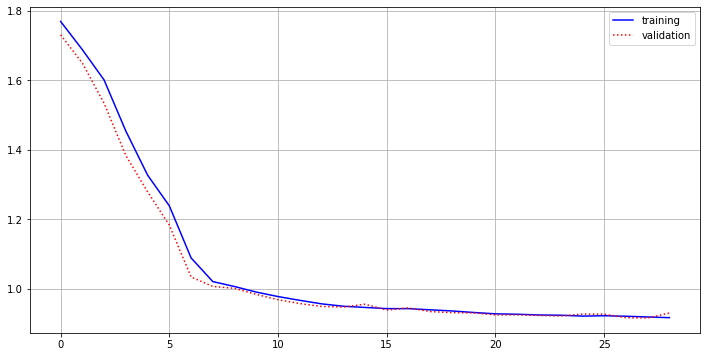

In [19]:
# Loss plot
plt.figure(figsize=(12, 6))
plt.plot(hist2.history['loss'][1:], 'b-', label="training")
plt.plot(hist2.history['val_loss'][1:], 'r:', label="validation")
plt.grid(True)
plt.legend()
plt.show()

In [20]:
predict = model2.predict(test_data)
predict.shape

(50000, 10)

In [21]:
for i in range(10):
    print(predict[i])
    print(test_labels[i])
    print('==============')

[ 4.79877758e+00  1.11539945e-01  4.89228630e+00  1.37582168e-01
  4.32407204e-03 -5.87571086e-03  1.53029934e-02  5.22858230e-03
 -2.29757465e-02 -3.42953652e-02]
[4.48223657 0.19524984 7.48305588 0.13436895 0.         0.
 0.         0.         0.         0.        ]
[ 2.9983687e+00  1.6773693e-01  3.1656821e+00  1.7800160e-01
 -3.5216279e-02  2.4208803e-02 -2.7466184e-03  4.0121675e-02
  3.0637546e-02 -1.0974866e-02]
[4.94836371 0.11747494 0.02327687 0.19432766 0.         0.
 0.         0.         0.         0.        ]
[ 4.8641086   0.17345454  4.9135776   0.09907498 -0.04426271  0.02476243
 -0.01060495  0.01688685 -0.00981034  0.04616112]
[6.17082145e-03 1.02225172e-01 9.74048952e+00 1.01182191e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[ 7.0846806   0.14140481  7.1017485   0.08612724  0.03680871 -0.06263214
  0.01118621 -0.06607369 -0.01119281 -0.01936383]
[8.52228626 0.10071227 5.83649424 0.18469204 0.         0.
 0.         0

In [0]:
def simple(x, *args):
    ''' returns sum of Multi-Lorentzian function 
    corresponding to each two arguments (a, b)'''
    a = args[::2]
    b = args[1::2]

    result = 0
    for i in range(len(a)):
        if a[i] > 0 and b[i] > 0:
            if len(a) == len(b):
                result += b[i] / ((x - a[i])**2 + b[i]**2)

    return result 

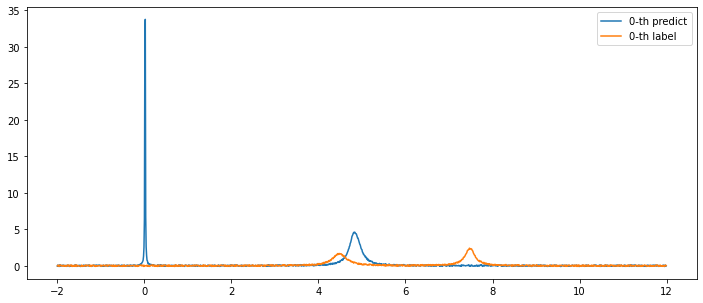

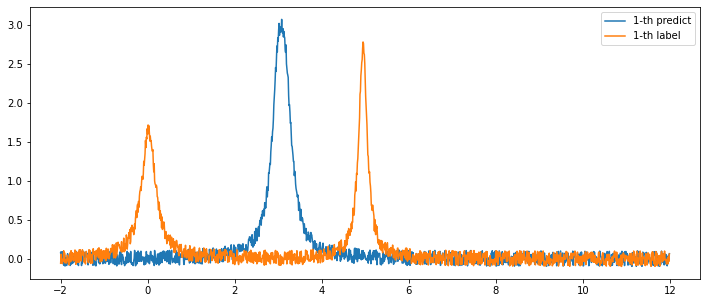

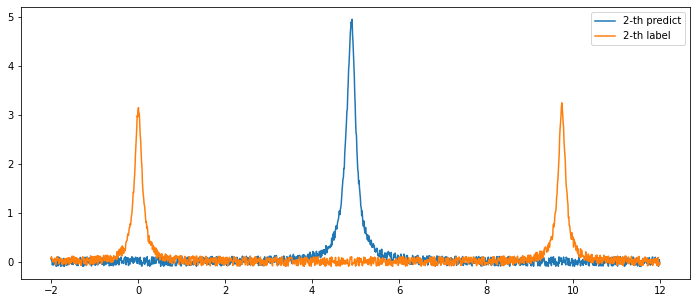

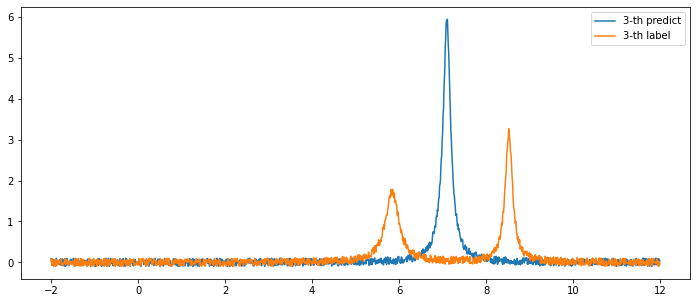

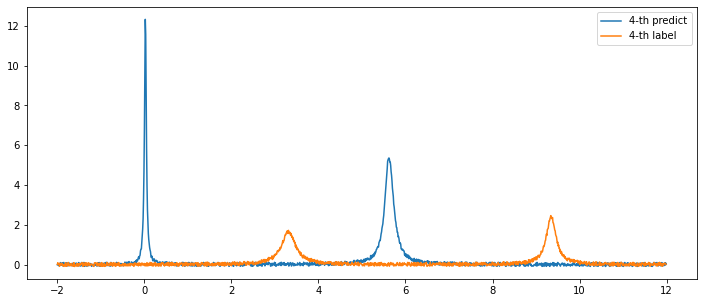

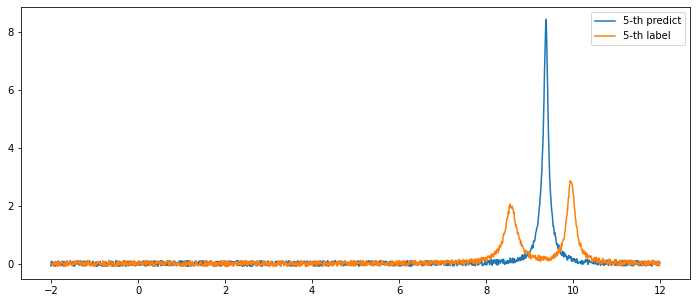

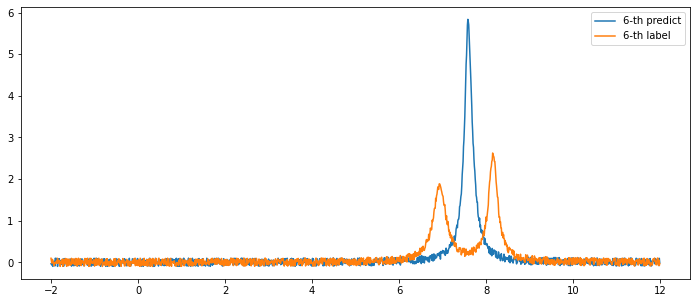

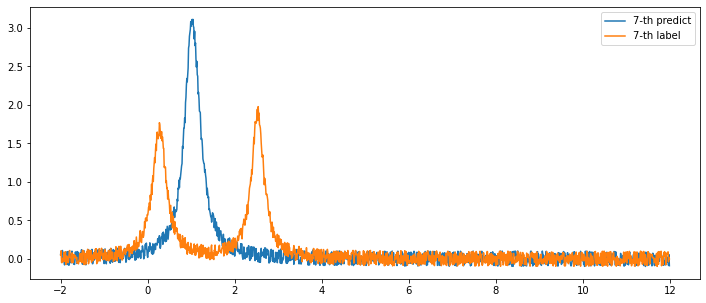

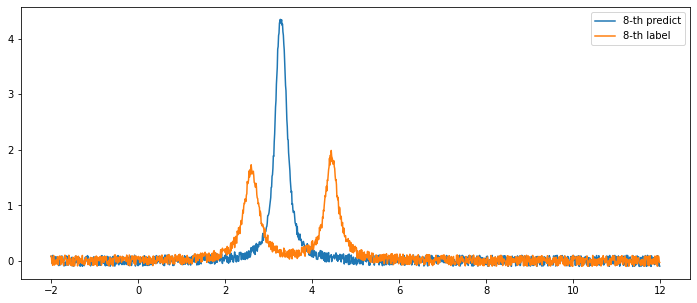

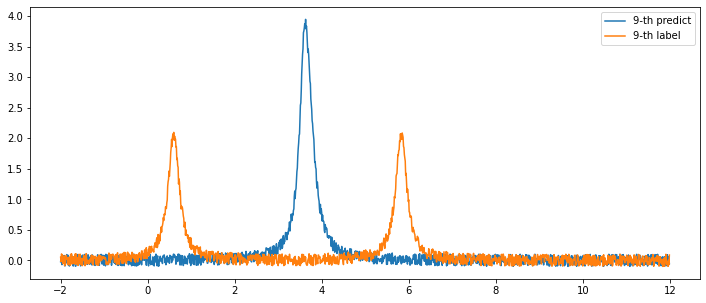

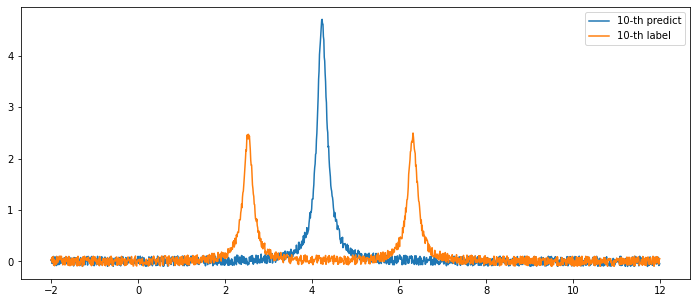

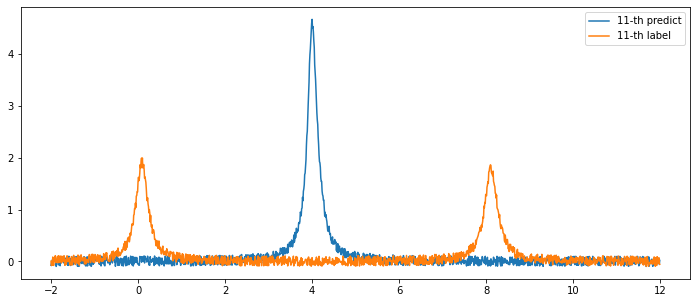

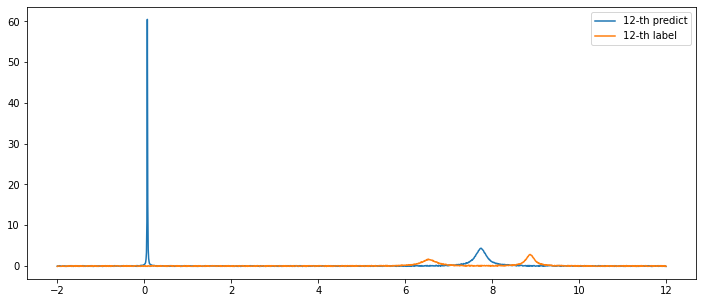

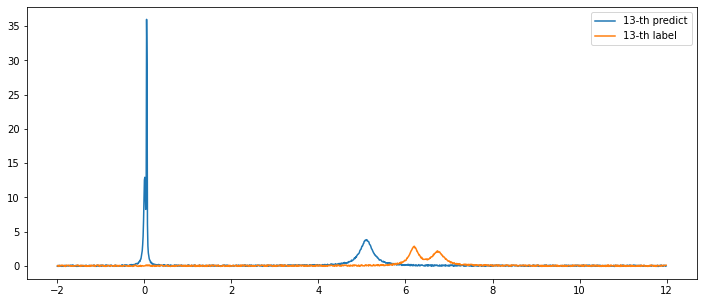

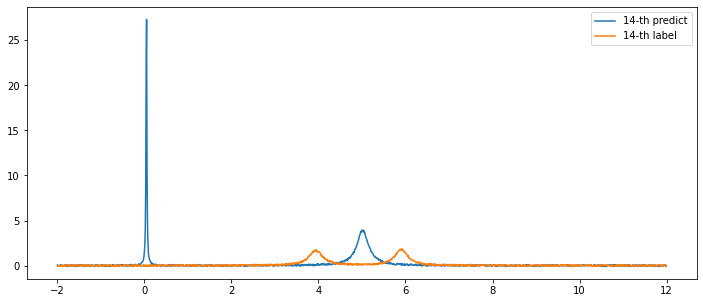

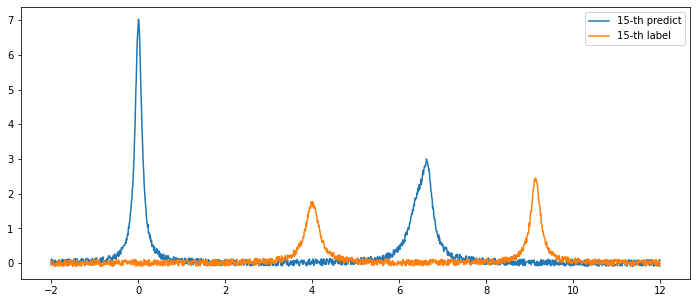

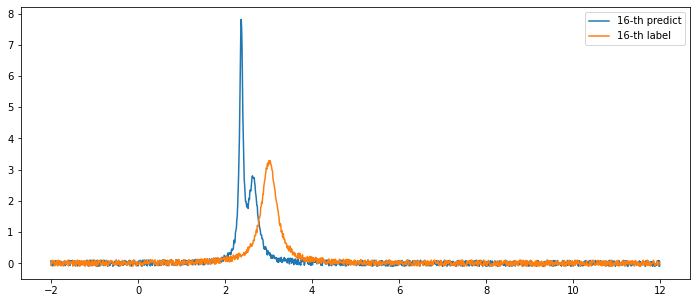

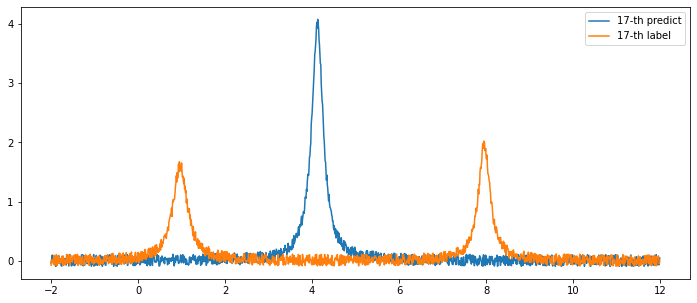

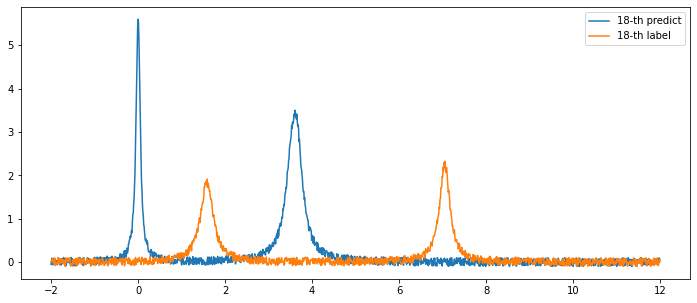

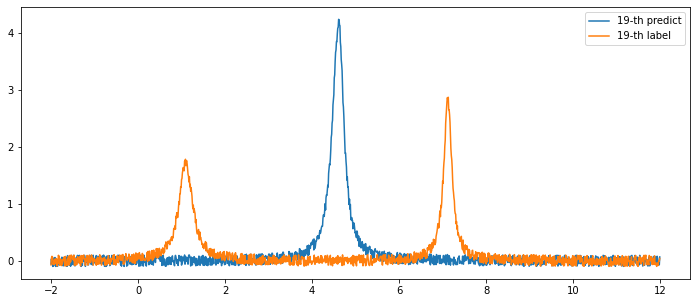

In [22]:
for i in range(20):
    plt.figure(figsize=(12,5))
    plt.plot(x, Lorentzian(x, *list(predict[i])), label=str(i)+'-th predict')
    plt.plot(x, test_data[i], label=str(i)+'-th label')
    #plt.plot(x, simple(x, *list(predict[i])), label=str(i)+'-th exact')
    plt.legend()
    plt.show()

In [0]:
# Check the architecture of the CNN
print(model2.layers[0])
print(model2.layers[1])
print(model2.layers[2])
print(model2.layers[3])
print(model2.layers[4])
print(model2.layers[5])
print(model2.layers[6])
print(model2.layers[7])
print(model2.layers[8])



In [0]:
for i in range(9):
    print(str(i) +'-th layer :', len(model2.layers[i].get_weights()))

0-th layer : 2
1-th layer : 0
2-th layer : 2
3-th layer : 0
4-th layer : 2
5-th layer : 0
6-th layer : 0
7-th layer : 2
8-th layer : 2


In [0]:
layer_0 = model2.layers[0].get_weights()

layer_2 = model2.layers[2].get_weights()

layer_4 = model2.layers[4].get_weights()

layer_5 = model2.layers[5].get_weights()

layer_6 = model2.layers[6].get_weights()



In [0]:
# 첫번째 컨볼루션 필터
filter_0 = layer_0[0]
filter_0.shape # 16개의 필터가 커널사이즈 10으로 존재함

(100, 1, 64)

In [0]:
# 2번째 컨볼루션 필터
filter_2 = layer_2[0]
filter_2.shape

(60, 64, 32)

In [0]:
# 완전연결층
layer_2[1].shape

(32,)

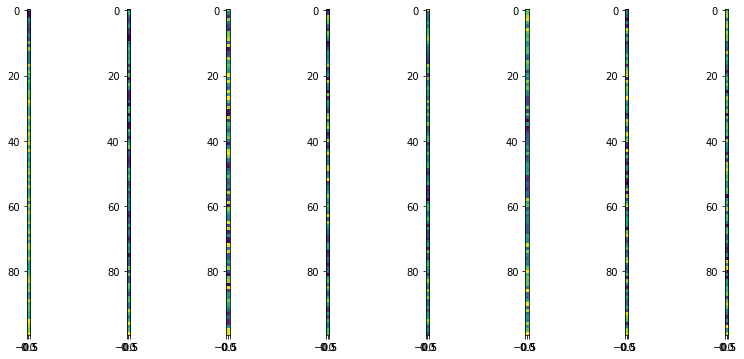

In [0]:
# 첫번째 컨볼루션 필터 시각화
M = 8
plt.figure(figsize=(14, 6))

for i in range(M):  
    plt.subplot(1, M, i + 1)  # Subplot : from 1 to 8
    plt.imshow(filter_0[ :, :,i]) # 1st-conv filter showing
    plt.grid(False)

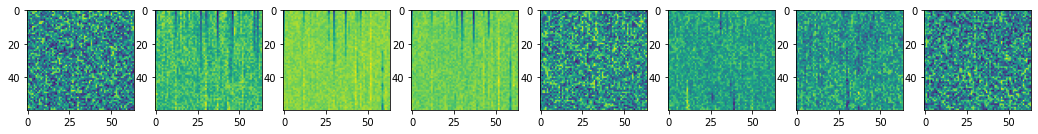

In [0]:
# 두번째 컨볼루션 필터 시각화
M = 8
plt.figure(figsize=(18, 6))

for i in range(M):
    plt.subplot(1, M, i + 1)  # Subplot from 1 to 8
    plt.imshow(filter_2[:, :, i]) # (10, 16) filter showing -> (10, 16) = (10, 1)filter * 16
    plt.grid(False)

In [0]:
# 각각의 레이어에서의 출력을 확인하기
import tensorflow.keras.backend as K

# Outputs of each layers
f0 = K.function([model2.input], [model2.layers[0].output])
f1 = K.function([model2.input], [model2.layers[1].output])
f2 = K.function([model2.input], [model2.layers[2].output])
f3 = K.function([model2.input], [model2.layers[3].output])
f4 = K.function([model2.input], [model2.layers[4].output])
f5 = K.function([model2.input], [model2.layers[5].output])
f6 = K.function([model2.input], [model2.layers[6].output])
f7 = K.function([model2.input], [model2.layers[7].output])


In [0]:
n = 0
x = train_data[n:n+1]

print(x.shape)

(1, 1300, 1)


Text(0.5, 1, 'Input data')

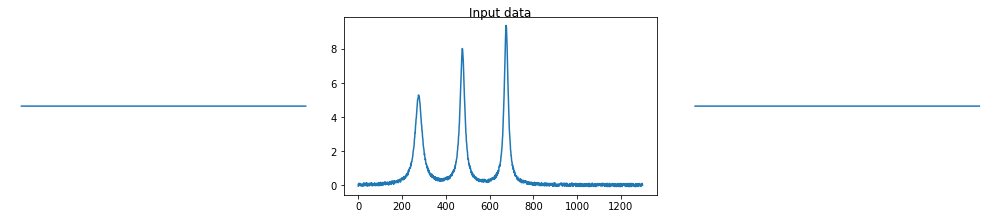

In [0]:
plt.figure(figsize=(14, 3))  # Figure generated

for i in range(3): 
    plt.subplot(1, 3, i + 1)  # three Subplot generated
    if i == 1:                # center plot
        plt.plot(x[0])        # image showed
    else:  
        plt.plot(np.zeros_like(x[0]))  # zero image
        plt.axis("off")
plt.tight_layout()
plt.suptitle("Input data", y=1)
# one image showing at center 

In [0]:
# 1번째 컨볼루션 층 출력결과
z0 = f0([x])[0]
z0.shape

(1, 1201, 64)

Text(0.5, 1.1, 'After 1st Conv1D filter')

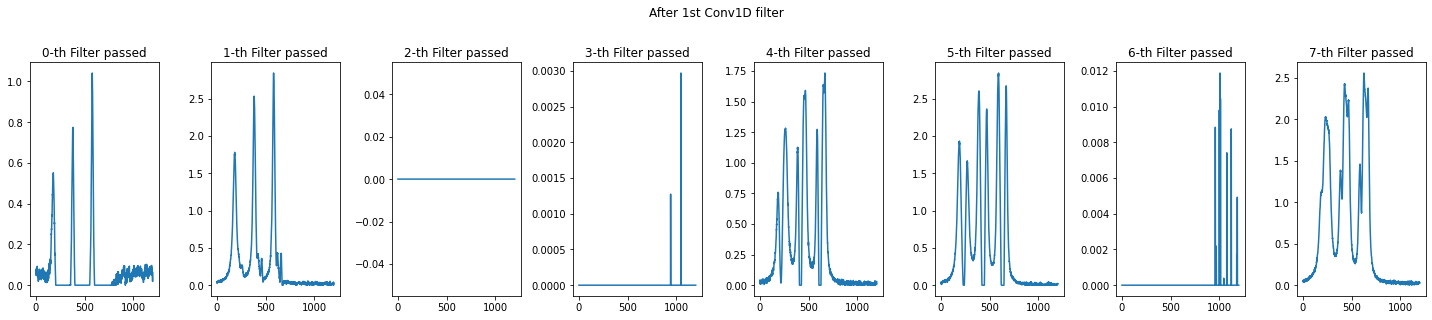

In [0]:
plt.figure(figsize=(20, 4))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z0[0, :, i])
    plt.axis('on')
    
    plt.title("{}-th Filter passed".format(i))
plt.tight_layout()
plt.suptitle("After 1st Conv1D filter", y=1.1)

In [0]:
# 2번째 맥스풀링층 출력 결과
z1 = f1([x])[0]
print(z1.shape)


(1, 600, 64)


Text(0.5, 1.1, 'After MaxPooling1D')

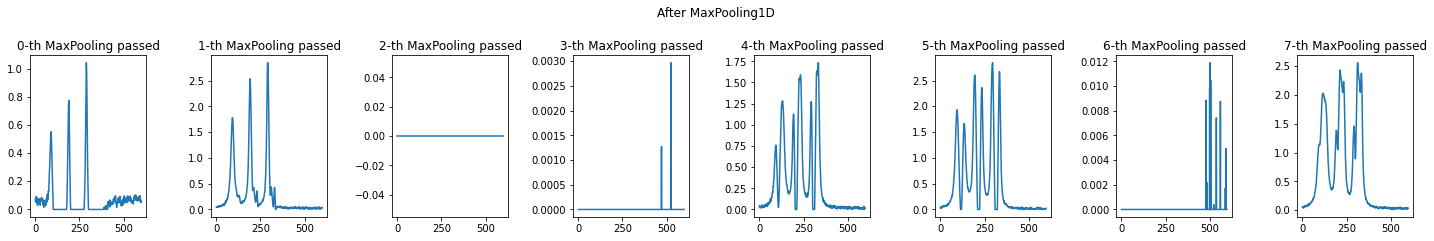

In [0]:
plt.figure(figsize=(20, 3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z1[0, :, i])
    
    plt.title("{}-th MaxPooling passed".format(i))
plt.tight_layout()
plt.suptitle("After MaxPooling1D", y=1.1)
        

In [0]:
# 3번째 컨볼루션 층 출력결과
z2 = f2([x])[0]
print(z2.shape)

(1, 541, 32)


Text(0.5, 1.1, 'After 2nd Conv1D')

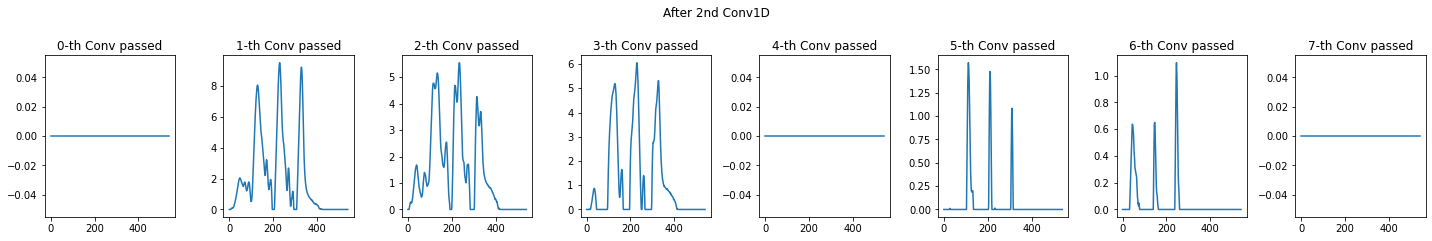

In [0]:
plt.figure(figsize=(20, 3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z2[0, :, i])
    
    plt.title("{}-th Conv passed".format(i))
plt.tight_layout()
plt.suptitle("After 2nd Conv1D", y=1.1)

In [0]:
# 4번째 MaxPooling 층 출력결과
z3 = f3([x])[0]
print(z3.shape)

(1, 270, 32)


Text(0.5, 1.1, 'After 2nd MaxPooling')

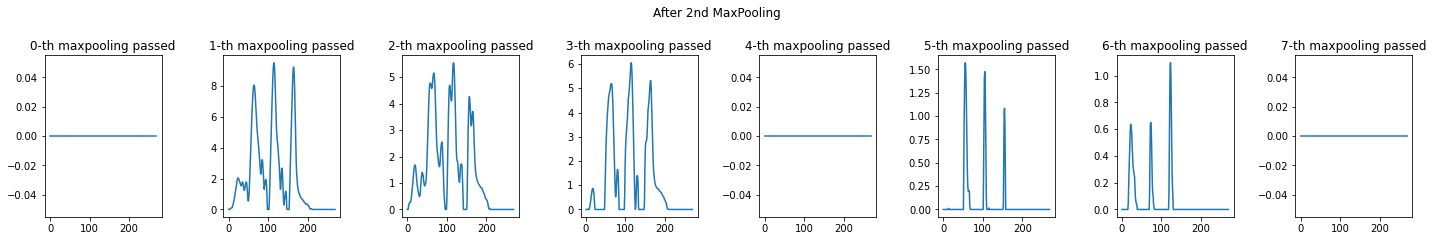

In [0]:
plt.figure(figsize=(20, 3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z3[0, :, i])
    
    plt.title("{}-th maxpooling passed".format(i))
plt.tight_layout()
plt.suptitle("After 2nd MaxPooling", y=1.1)

In [0]:
# 5번째층 GlobalMaxPooling층 출력 결과
z4 = f4([x])[0]
print(z4.shape)
print(z4)

(1, 231, 32)
[[[2.204544   0.         0.         ... 0.         1.6181899  0.        ]
  [2.2299318  0.         0.         ... 0.         1.4312189  0.        ]
  [2.2264311  0.         0.         ... 0.         1.3240132  0.        ]
  ...
  [0.         0.         0.20716847 ... 0.         0.         2.8600745 ]
  [0.         0.         0.2101673  ... 0.         0.         2.8570542 ]
  [0.         0.         0.21045625 ... 0.         0.         2.852913  ]]]


TypeError: ignored

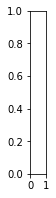

In [0]:
plt.figure(figsize=(10, 3))
plt.imshow(z4, aspect=10)
plt.xticks([]); plt.yticks([]); plt.grid(False)
plt.title("vectorizing")

In [0]:
# 6번째층 Dense Layer(Fully Connected Layer) 출력 결과
z5 = f5([x])[0]
print(z5.shape)

plt.figure(figsize=(12, 4))
plt.imshow(z5)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(z5[0])
plt.show()

In [0]:
# 7번째 Dropout 층 출력 결과
z6 = f6([x])[0]
print(z6.shape)

plt.figure(figsize=(12, 4))
plt.imshow(z6)
plt.show()


plt.figure(figsize=(12, 4))
plt.plot(z6[0])
plt.show()

In [0]:
# 8번째 최종출력층 출력 결과
z7 = f7([x])[0]
print(z7)

plt.figure(figsize=(10,2))
plt.imshow(z7)
plt.show()

In [0]:
# 1차원 데이터에 대응되는 라벨은 뭘로? => 적분값과 peak 수는 안정적인 라벨로 작용, 하지만 목적에 안맞는다.
# 라벨 -> 원래 의도대로 mean position, width로 되돌림
# 로렌치안 함수 정의에 약간의 오류 발견 -> 수정, 재시도하였음
# 이전보다 상당히 나아진 듯, 

# 해석하기 어려운 것
# 각 컨볼루션 층에서의 필터가 의미하는 것?? -> 시각화해도 의미를 설명하기 어렵다.
# 각각의 레이어의 정보를 완전히 표현하는 방법 좀 더 공부..